## Step 1: Load a Sample of the Dataset

To avoid performance issues while working with a large dataset (~60,000 jobs), I loaded only the first 5,000 rows for initial exploration. This allows me to have quicker previews and a smoother development process.

In [90]:
import pandas as pd

file_path = '/Users/bharathisudhadurgirala/Downloads/Projects/Project 1/job_report_2025.csv'

df = pd.read_csv(file_path, nrows=5000)
df.head()

,total_jobs,jobs
0,59959,"[{'id': 'in-a0162397741337e8', 'title': 'White..."


## Step 2: Flatten the Nested Jobs Column

The original dataset contains a `jobs` column containing a list of job dictionaries for each row. I extracted this nested data using `ast.literal_eval()` and normalized it into a clean table using `pd.json_normalize()`. This results in a structured DataFrame with each job as a separate row and fields like `title`, `company_name`, and `location` as columns.

In [92]:
import ast
from pandas import json_normalize

# Convert the string of list-of-dictionaries to a Python object
job_list = ast.literal_eval(df.loc[0, 'jobs'])

# Normalize the JSON to flatten it into a proper DataFrame
jobs_df = json_normalize(job_list)

# Preview the flattened job listings
jobs_df.head()

,id,title,company_name,job_url,job_url_direct,description,company_url,company_url_direct,job_type,date_posted,emails,is_remote,listing_type,job_level,company_industry,company_addresses,company_num_employees,company_revenue,company_description,company_logo,banner_photo_url,job_function,location.country,location.city,location.state,compensation.interval,compensation.min_amount,compensation.max_amount,compensation.currency,compensation
0,in-a0162397741337e8,White Mountain Trail Crew Field Coordinator,Appalachian Mountain Club,https://www.indeed.com/viewjob?jk=a01623977413...,https://www.paycomonline.net/v4/ats/web.php/jo...,"April 7\-Oct 31, 2025\. Dates can be flexible,...",https://www.indeed.com/cmp/Appalachian-Mountai...,None,[],2025-01-08,[],False,None,None,None,None,201 to 500,$25M to $100M (USD),"At the Appalachian Mountain Club (AMC), connec...",https://d2q79iu7y748jz.cloudfront.net/s/_squar...,None,None,US,Gorham,NH,hourly,NaN,NaN,USD,NaN
1,in-de356b3c36971bc8,Assistant Community Manager | Lancaster Villag...,CSM Corporation,https://www.indeed.com/viewjob?jk=de356b3c3697...,https://recruiting2.ultipro.com/CSM1000CSMM/Jo...,The Lancaster Village Apartments are looking f...,https://www.indeed.com/cmp/Csm-Corporation,http://csmcorp.net/,[fulltime],2025-01-08,[benefits@csmcorp.net],False,None,None,Real Estate,CSM Corporation Headquarters - 500 Washington ...,"1,001 to 5,000",None,CSM Corporation creates exceptional spaces whe...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,None,None,US,Plymouth,MN,yearly,40090.0,50764.0,USD,NaN
2,in-0719c4ebeb2ee8e6,PT Weekend Night Auditor (Friday and Saturday ...,None,https://www.indeed.com/viewjob?jk=0719c4ebeb2e...,https://recruiting2.ultipro.com/CSM1000CSMM/Jo...,* Performs the manager\-on\-duty role during 3...,None,None,[parttime],2025-01-07,[],False,None,None,None,None,None,None,None,None,None,None,US,Lansing,MI,yearly,28942.0,36647.0,USD,NaN
3,in-042b575494ab385a,Leasing Consultant,CSM Corporation,https://www.indeed.com/viewjob?jk=042b575494ab...,https://recruiting2.ultipro.com/CSM1000CSMM/Jo...,This position is responsible for the leasing a...,https://www.indeed.com/cmp/Csm-Corporation,http://csmcorp.net/,[fulltime],2025-01-06,[],False,None,None,Real Estate,CSM Corporation Headquarters - 500 Washington ...,"1,001 to 5,000",None,CSM Corporation creates exceptional spaces whe...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,None,None,US,Gladstone,OR,hourly,NaN,NaN,USD,NaN
4,in-a013bb09e245a9d4,Assistant General Manager | Residence Inn Denv...,None,https://www.indeed.com/viewjob?jk=a013bb09e245...,https://recruiting2.ultipro.com/CSM1000CSMM/Jo...,"**Salary: $60,000\-65,000**\n\n\n**Benefits:**...",None,None,[fulltime],2025-01-02,[],False,None,None,None,None,None,None,None,None,None,None,US,Englewood,CO,yearly,60000.0,65000.0,USD,NaN


## Step 3: Previewing the Flattened Job Listings

I used `head()` to preview the top rows of our structured job listings. This confirms that the flattening process worked and reveals the available fields for analysis, including job title, company, city, state, and compensation details.

In [94]:
jobs_df.head(10)  # Shows first 10 jobs

,id,title,company_name,job_url,job_url_direct,description,company_url,company_url_direct,job_type,date_posted,emails,is_remote,listing_type,job_level,company_industry,company_addresses,company_num_employees,company_revenue,company_description,company_logo,banner_photo_url,job_function,location.country,location.city,location.state,compensation.interval,compensation.min_amount,compensation.max_amount,compensation.currency,compensation
0,in-a0162397741337e8,White Mountain Trail Crew Field Coordinator,Appalachian Mountain Club,https://www.indeed.com/viewjob?jk=a01623977413...,https://www.paycomonline.net/v4/ats/web.php/jo...,"April 7\-Oct 31, 2025\. Dates can be flexible,...",https://www.indeed.com/cmp/Appalachian-Mountai...,None,[],2025-01-08,[],False,None,None,None,None,201 to 500,$25M to $100M (USD),"At the Appalachian Mountain Club (AMC), connec...",https://d2q79iu7y748jz.cloudfront.net/s/_squar...,None,None,US,Gorham,NH,hourly,NaN,NaN,USD,NaN
1,in-de356b3c36971bc8,Assistant Community Manager | Lancaster Villag...,CSM Corporation,https://www.indeed.com/viewjob?jk=de356b3c3697...,https://recruiting2.ultipro.com/CSM1000CSMM/Jo...,The Lancaster Village Apartments are looking f...,https://www.indeed.com/cmp/Csm-Corporation,http://csmcorp.net/,[fulltime],2025-01-08,[benefits@csmcorp.net],False,None,None,Real Estate,CSM Corporation Headquarters - 500 Washington ...,"1,001 to 5,000",None,CSM Corporation creates exceptional spaces whe...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,None,None,US,Plymouth,MN,yearly,40090.0,50764.0,USD,NaN
2,in-0719c4ebeb2ee8e6,PT Weekend Night Auditor (Friday and Saturday ...,None,https://www.indeed.com/viewjob?jk=0719c4ebeb2e...,https://recruiting2.ultipro.com/CSM1000CSMM/Jo...,* Performs the manager\-on\-duty role during 3...,None,None,[parttime],2025-01-07,[],False,None,None,None,None,None,None,None,None,None,None,US,Lansing,MI,yearly,28942.0,36647.0,USD,NaN
3,in-042b575494ab385a,Leasing Consultant,CSM Corporation,https://www.indeed.com/viewjob?jk=042b575494ab...,https://recruiting2.ultipro.com/CSM1000CSMM/Jo...,This position is responsible for the leasing a...,https://www.indeed.com/cmp/Csm-Corporation,http://csmcorp.net/,[fulltime],2025-01-06,[],False,None,None,Real Estate,CSM Corporation Headquarters - 500 Washington ...,"1,001 to 5,000",None,CSM Corporation creates exceptional spaces whe...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,None,None,US,Gladstone,OR,hourly,NaN,NaN,USD,NaN
4,in-a013bb09e245a9d4,Assistant General Manager | Residence Inn Denv...,None,https://www.indeed.com/viewjob?jk=a013bb09e245...,https://recruiting2.ultipro.com/CSM1000CSMM/Jo...,"**Salary: $60,000\-65,000**\n\n\n**Benefits:**...",None,None,[fulltime],2025-01-02,[],False,None,None,None,None,None,None,None,None,None,None,US,Englewood,CO,yearly,60000.0,65000.0,USD,NaN
5,in-e5b246c8bce46166,Front Desk Agent,CSM Corporation,https://www.indeed.com/viewjob?jk=e5b246c8bce4...,https://recruiting2.ultipro.com/CSM1000CSMM/Jo...,This position is responsible for anticipating ...,https://www.indeed.com/cmp/Csm-Corporation,http://csmcorp.net/,[fulltime],2024-12-31,[],False,None,None,Real Estate,CSM Corporation Headquarters - 500 Washington ...,"1,001 to 5,000",None,CSM Corporation creates exceptional spaces whe...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,None,None,US,Englewood,CO,hourly,NaN,NaN,USD,NaN
6,in-7a8f887803e313d7,Residential Marketing & Operations Intern,CSM Corporation,https://www.indeed.com/viewjob?jk=7a8f887803e3...,https://recruiting2.ultipro.com/CSM1000CSMM/Jo...,This internship will provide support to CSM’s ...,https://www.indeed.com/cmp/Csm-Corporation,http://csmcorp.net/,[fulltime],2024-12-11,[],False,None,None,Real Estate,CSM Corporation Headquarters - 500 Washington ...,"1,001 to 5,000",None,CSM Corporation creates exceptional spaces whe...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,None,None,US,Minneapolis,MN,yearly,35792.0,45320.0,USD,NaN
7,in-967cf278e48fc006,Business Administration I

## Step 4: Viewing More Data

Jupyter limits the number of rows and columns it displays by default. I temporarily changed the display settings using `pd.set_option('display.max_columns', None)` to view all available columns in this flattened DataFrame. I also used `head(20)` to view more rows simultaneously.

In [96]:
# Temporarily show all columns
pd.set_option('display.max_columns', None)

# Preview again
jobs_df.head()

,id,title,company_name,job_url,job_url_direct,description,company_url,company_url_direct,job_type,date_posted,emails,is_remote,listing_type,job_level,company_industry,company_addresses,company_num_employees,company_revenue,company_description,company_logo,banner_photo_url,job_function,location.country,location.city,location.state,compensation.interval,compensation.min_amount,compensation.max_amount,compensation.currency,compensation
0,in-a0162397741337e8,White Mountain Trail Crew Field Coordinator,Appalachian Mountain Club,https://www.indeed.com/viewjob?jk=a01623977413...,https://www.paycomonline.net/v4/ats/web.php/jo...,"April 7\-Oct 31, 2025\. Dates can be flexible,...",https://www.indeed.com/cmp/Appalachian-Mountai...,None,[],2025-01-08,[],False,None,None,None,None,201 to 500,$25M to $100M (USD),"At the Appalachian Mountain Club (AMC), connec...",https://d2q79iu7y748jz.cloudfront.net/s/_squar...,None,None,US,Gorham,NH,hourly,NaN,NaN,USD,NaN
1,in-de356b3c36971bc8,Assistant Community Manager | Lancaster Villag...,CSM Corporation,https://www.indeed.com/viewjob?jk=de356b3c3697...,https://recruiting2.ultipro.com/CSM1000CSMM/Jo...,The Lancaster Village Apartments are looking f...,https://www.indeed.com/cmp/Csm-Corporation,http://csmcorp.net/,[fulltime],2025-01-08,[benefits@csmcorp.net],False,None,None,Real Estate,CSM Corporation Headquarters - 500 Washington ...,"1,001 to 5,000",None,CSM Corporation creates exceptional spaces whe...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,None,None,US,Plymouth,MN,yearly,40090.0,50764.0,USD,NaN
2,in-0719c4ebeb2ee8e6,PT Weekend Night Auditor (Friday and Saturday ...,None,https://www.indeed.com/viewjob?jk=0719c4ebeb2e...,https://recruiting2.ultipro.com/CSM1000CSMM/Jo...,* Performs the manager\-on\-duty role during 3...,None,None,[parttime],2025-01-07,[],False,None,None,None,None,None,None,None,None,None,None,US,Lansing,MI,yearly,28942.0,36647.0,USD,NaN
3,in-042b575494ab385a,Leasing Consultant,CSM Corporation,https://www.indeed.com/viewjob?jk=042b575494ab...,https://recruiting2.ultipro.com/CSM1000CSMM/Jo...,This position is responsible for the leasing a...,https://www.indeed.com/cmp/Csm-Corporation,http://csmcorp.net/,[fulltime],2025-01-06,[],False,None,None,Real Estate,CSM Corporation Headquarters - 500 Washington ...,"1,001 to 5,000",None,CSM Corporation creates exceptional spaces whe...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,None,None,US,Gladstone,OR,hourly,NaN,NaN,USD,NaN
4,in-a013bb09e245a9d4,Assistant General Manager | Residence Inn Denv...,None,https://www.indeed.com/viewjob?jk=a013bb09e245...,https://recruiting2.ultipro.com/CSM1000CSMM/Jo...,"**Salary: $60,000\-65,000**\n\n\n**Benefits:**...",None,None,[fulltime],2025-01-02,[],False,None,None,None,None,None,None,None,None,None,None,US,Englewood,CO,yearly,60000.0,65000.0,USD,NaN


## 1. Top Job Titles

As part of this analysis, I identified the most frequently listed job titles across the dataset. This helps us understand the current hiring focus and trending roles in the data and tech job markets — particularly valuable for strategic workforce planning or talent acquisition.

title
Software Application Development Engineer                      530
Team Member                                                    291
Sales Associate                                                260
Assistant Manager                                              194
Government Information Security Manager                        161
Task Associate                                                 147
Store Manager                                                  119
Retail Sales – Part Time                                       112
Team Member (Full Time & Part Time Storewide Opportunities)    111
Maintenance Technician                                         108
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Job Titles'}, ylabel='title'>

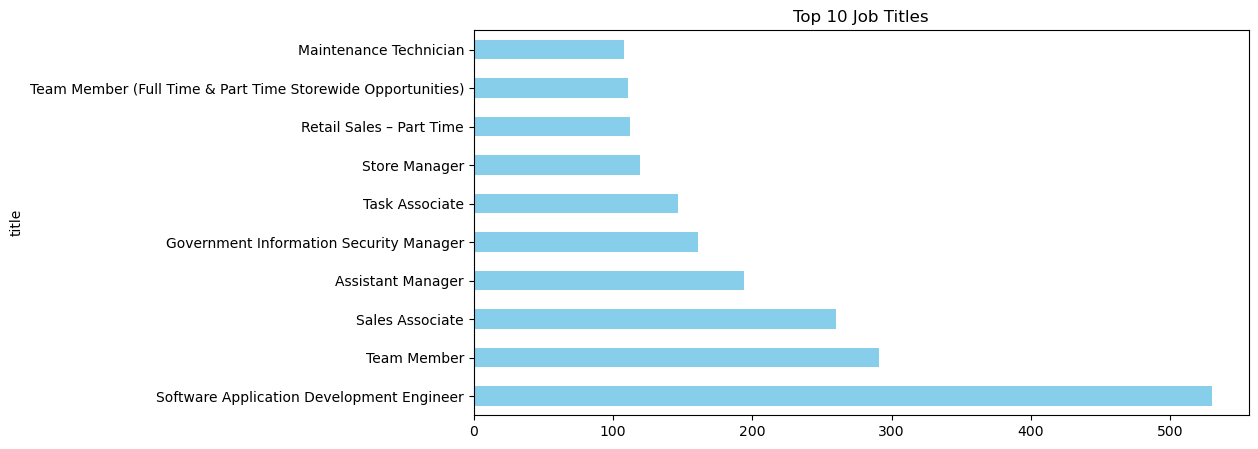

In [98]:
top_titles = jobs_df['title'].value_counts().head(10)
print(top_titles)

# Visualize
top_titles.plot(kind='barh', figsize=(10, 5), color='skyblue', title='Top 10 Job Titles')

## 2. Top Hiring Companies

Here, I focused on companies with the highest number of job postings. These insights highlight major players in the hiring space, allowing consultants or HR strategists to identify potential competitors or partners actively scaling their workforce.

company_name
Intel Corporation          1318
Lowe's Home Improvement     532
Capital One                 478
Wells Fargo                 396
Circle K                    385
Indeed                      352
Advance Auto Parts          303
Aimbridge Hospitality       291
Petco                       282
Cargill                     252
Name: count, dtype: int64


<Axes: title={'center': 'Top Hiring Companies'}, xlabel='company_name'>

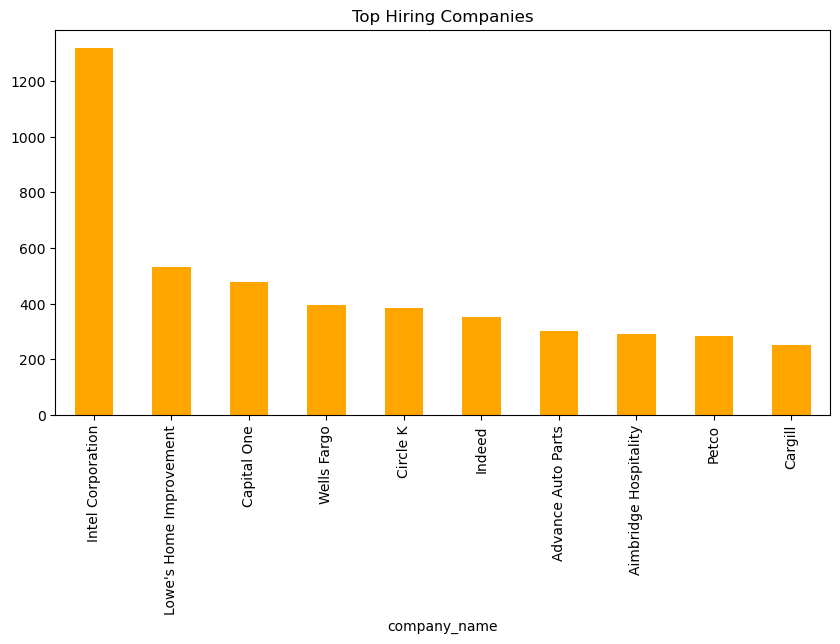

In [100]:
top_companies = jobs_df['company_name'].value_counts().head(10)
print(top_companies)

# Visualize
top_companies.plot(kind='bar', figsize=(10, 5), color='orange', title='Top Hiring Companies')

## 3. Remote vs Hybrid vs On-Site Jobs

Understanding work arrangement trends is essential in today's flexible work environment. I categorized job roles as Remote, Hybrid, or On-Site based on language in the job description. This helps business consultants assess industry preferences and inform policy or operational shifts.

<Axes: title={'center': 'Job Location Types'}, ylabel='count'>

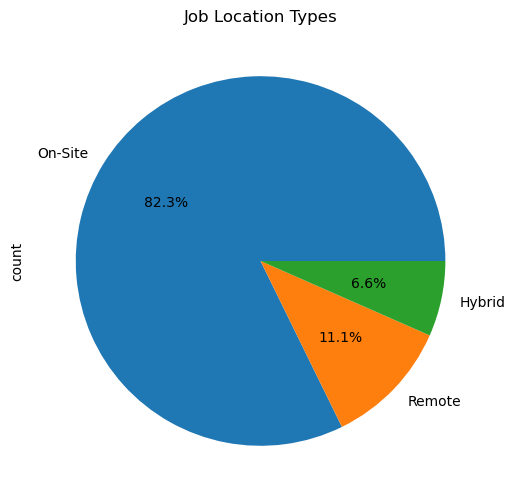

In [102]:
jobs_df['location_type'] = jobs_df['description'].fillna('').apply(
    lambda x: 'Remote' if 'remote' in x.lower() else ('Hybrid' if 'hybrid' in x.lower() else 'On-Site')
)

jobs_df['location_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Job Location Types')

## 4. Top Required Skills (from Descriptions)

Using keyword analysis on job descriptions, I extracted frequently requested technical skills. This provides valuable insight into current skill gaps, informing training investments, curriculum planning, or team upskilling strategies.

<Axes: title={'center': 'Most Mentioned Skills'}>

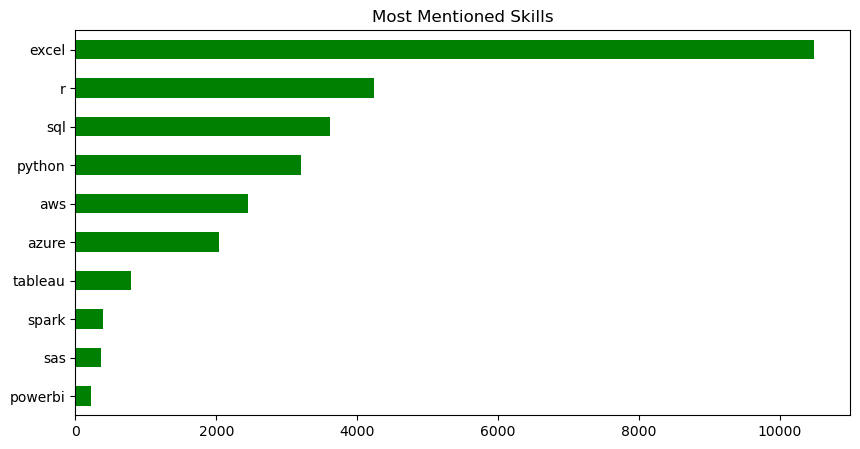

In [104]:
from collections import Counter
import re

# Combine all descriptions
text_blob = ' '.join(jobs_df['description'].dropna().astype(str))

# Tokenize and filter
words = re.findall(r'\b\w+\b', text_blob.lower())
skill_keywords = ['python', 'sql', 'excel', 'tableau', 'powerbi', 'r', 'spark', 'aws', 'azure', 'sas']
skill_counts = Counter([word for word in words if word in skill_keywords])

# Plot
pd.Series(skill_counts).sort_values().plot(kind='barh', figsize=(10, 5), color='green', title='Most Mentioned Skills')

## 5. Salary Distribution (if available)

Where available, I analyzed salary ranges to evaluate compensation trends. This offers critical guidance to hiring managers and consultants in setting competitive salaries or benchmarking job value across regions and roles.

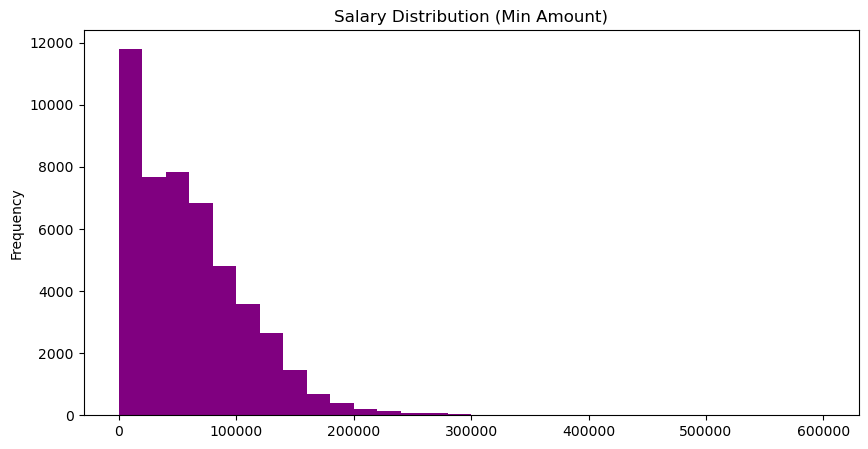

In [106]:
if 'compensation.min_amount' in jobs_df.columns:
    jobs_df['min_salary'] = pd.to_numeric(jobs_df['compensation.min_amount'], errors='coerce')
    jobs_df['min_salary'].dropna().plot(kind='hist', bins=30, figsize=(10, 5), color='purple', title='Salary Distribution (Min Amount)')
else:
    print("No salary data available.")